# Example function $\mathbb{R}^2 \rightarrow \mathbb{R}$

In [1]:
f = lambda x, y: x**2 + y**3 - 3*x*y

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_data = np.arange(-10, 10, 0.1)
y_data = np.arange(-10, 10, 0.1)
x_data, y_data = np.meshgrid(x_data, y_data)
z_data = f(x_data, y_data)

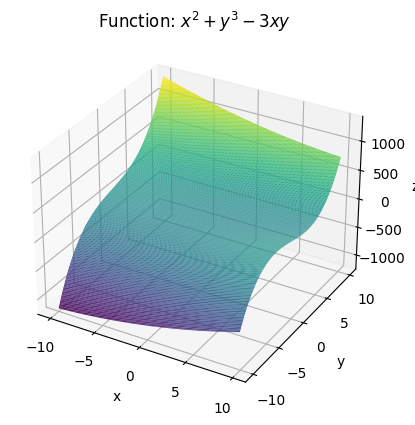

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x_data, y_data, z_data, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function: $x^2 + y^3 - 3 x y$');

# Solve with Keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [6]:
f = lambda varss: varss[0]**2 + varss[1]**3 - 3*varss[0]*varss[1]

In [4]:
def regression_with_keras(f, ranges=[(-10, 10, 0.1), (-10, 10, 0.1)], title_text='$x^2 + y^3 - 3 x y$'):
    
    input_vars = len(ranges)
    
    # create data for training from the function
    train_data = []
    for i in range(input_vars):
        train_data.append(np.array(np.arange(ranges[i][0], ranges[i][1], ranges[i][2]), dtype=np.float32))
    train_data = np.meshgrid(*train_data)
    train_data_y = f(train_data)
    train_data_model = np.hstack([v.flatten().reshape(-1, 1) for v in train_data])
    train_data_y_model = train_data_y.flatten()
    print(train_data_model.shape)
    print(train_data_y_model.shape)
    
    # create data for validating from the function
    val_data = []
    for i in range(input_vars):
        val_data.append(np.array(np.arange(ranges[i][0], ranges[i][1], ranges[i][2] - 0.008), dtype=np.float32))
    val_data = np.meshgrid(*val_data)
    val_data_y = f(val_data)
    val_data_model = np.hstack([v.flatten().reshape(-1, 1) for v in val_data])
    val_data_y_model = val_data_y.flatten()
    print(val_data_model.shape)
    print(val_data_y_model.shape)
    
    
    # define model
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=input_vars))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(8, activation="relu"))
    # regression is performed, then a Dense layer containing a single neuron with a linear activation function is used
    model.add(Dense(1, activation="linear"))

    # compile model: the model is initialized with the Adam optimizer
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3, decay=1e-3 / 200))

    # patience early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

    # fit the model
    history = model.fit(train_data_model, train_data_y_model, validation_data=(val_data_model, val_data_y_model), 
                        epochs=10000000, batch_size=100, verbose=0, callbacks=[es])

    # Calculate predictions
    pred_train_set = model.predict(train_data_model)
    pred_val_set = model.predict(val_data_model)
    
    # plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    plt.title('Training history')
    plt.xlabel('Epoch')
    plt.ylabel('Validation loss')
    plt.show()
    
    # plot actual vs prediction for training set
    plt.plot(train_data_y_model, pred_train_set, 'bo')
    plt.title('Training set')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    # compute R-Square value for training set
    test_r2_value = r2_score(train_data_y_model, pred_train_set)
    print("Training Set R-Square=", test_r2_value)
    
    # plot both original function and predicted
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(train_data[0], train_data[1], train_data_y, 
               label='True data', c='blue', alpha=0.5)
    ax.scatter(train_data[0], train_data[1], np.reshape(pred_train_set.flatten(), train_data_y.shape), 
               label='Predictions', c='orange', alpha=0.06)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Function: ' + title_text)
    plt.show()
    
    return train_data, train_data_y, pred_train_set

(40000, 2)
(40000,)
(47524, 2)
(47524,)
Epoch 3196: early stopping
1486/1486 [==============================] - 0s 186us/step


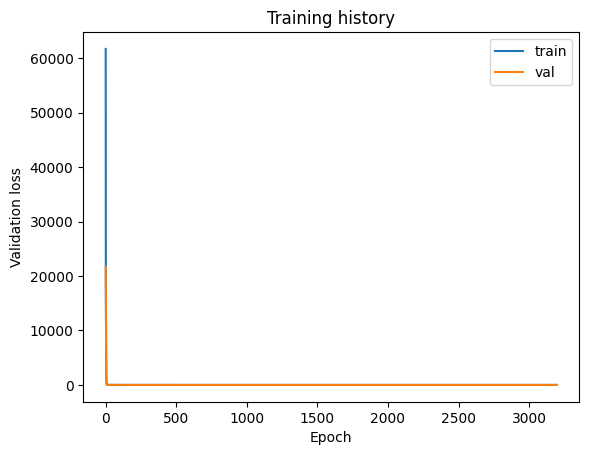

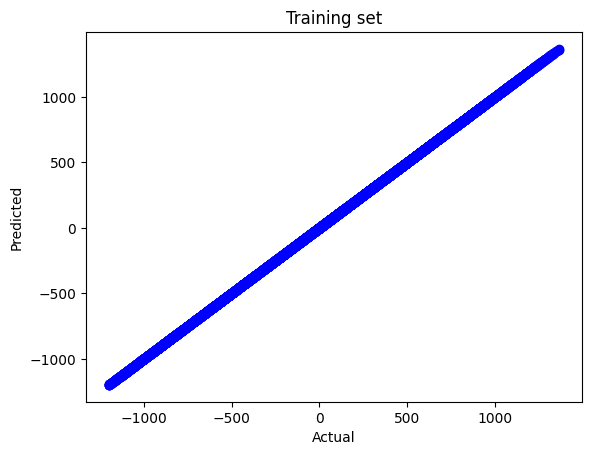

Training Set R-Square= 0.9999987207625253


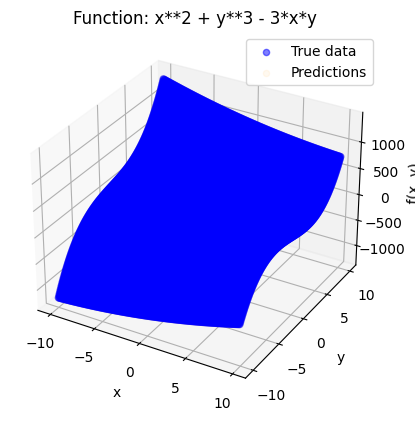

CPU times: user 15min 38s, sys: 6min 27s, total: 22min 5s
Wall time: 12min 47s


In [10]:
%%time

train_data, train_data_y, pred_train_set = regression_with_keras(f)

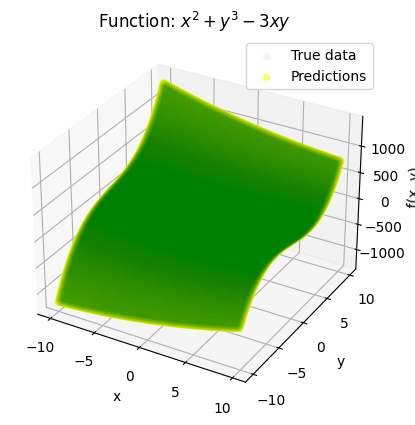

In [23]:
title_text='$x^2 + y^3 - 3 x y$'

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(train_data[0], train_data[1], train_data_y, 
                label='True data', c='green', alpha=0.04)
ax.scatter(train_data[0], train_data[1], np.reshape(pred_train_set.flatten(), train_data_y.shape), 
                label='Predictions', c='yellow', alpha=0.5)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function: ' + title_text)
plt.show()

# Example function $\mathbb{R}^3 \rightarrow \mathbb{R}$

In [5]:
g = lambda varss: - varss[0]**2 * varss[1]**2 + varss[0]**3 * varss[1]**2 * varss[2] - 9*varss[0]*varss[1]*varss[2]

(8000, 3)
(8000,)
(9261, 3)
(9261,)


2023-05-12 09:35:09.335359: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 3645: early stopping
290/290 [==============================] - 0s 309us/step


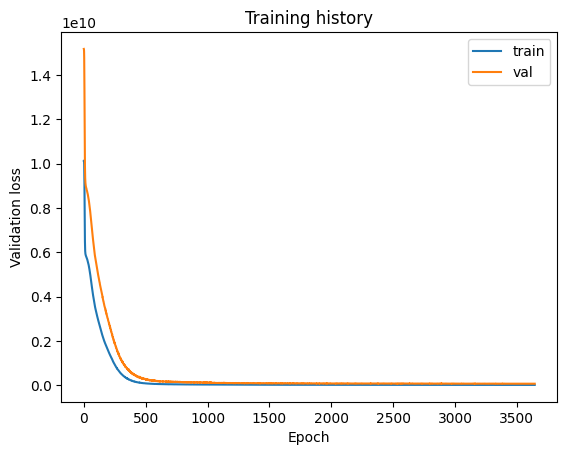

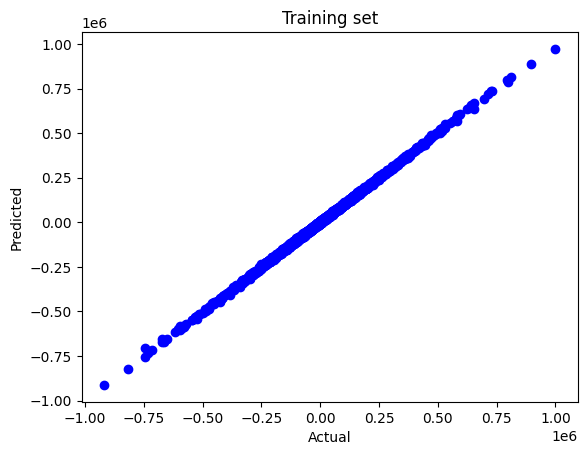

Training Set R-Square= 0.9990976039187651


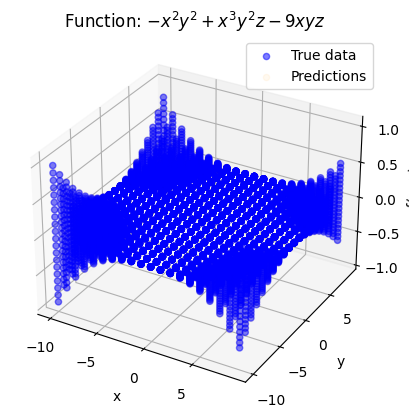

CPU times: user 4min 33s, sys: 2min 2s, total: 6min 36s
Wall time: 3min 49s


In [6]:
%%time

train_data_g, train_data_y_g, pred_train_set_g = regression_with_keras(g, 
                                                 ranges=[(-10, 10, 1), (-10, 10, 1), (-10, 10, 1)], 
                                                 title_text='$-x^2 y^2 + x^3 y^2 z - 9 x y z$')


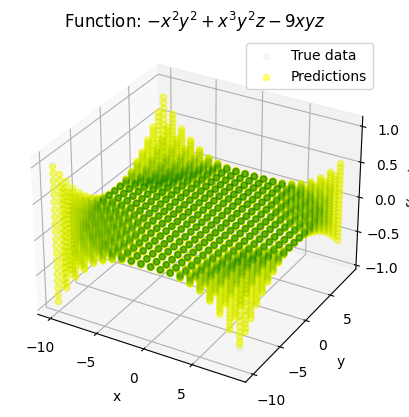

In [7]:
title_text='$-x^2 y^2 + x^3 y^2 z - 9 x y z$'

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(train_data_g[0], train_data_g[1], train_data_y_g, 
           label='True data', c='green', alpha=0.04)
ax.scatter(train_data_g[0], train_data_g[1], np.reshape(pred_train_set_g.flatten(), train_data_y_g.shape), 
           label='Predictions', c='yellow', alpha=0.5)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function: ' + title_text)
plt.show()